In [261]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

In [28]:
df = pd.read_csv(r'C:\Users\HP\Desktop\dataset.csv')

#### 1- Exploración de la base de datos

In [29]:
df.shape

(142473, 45)

In [103]:
df.head(10)

,ID_CLiente_BP,ID_Linea_Prestamo,Canal_Comercializacion,Ctd_Dias_Plazo,MNT_CAPITAL,Tasa,Fec_Desembolso,Fec_Inicio_Prestamo,Fec_Fin_Prestamo,SEXO,EDAD,ANIOS_ANTIGUEDAD,SUCURSAL_ACREDITACION,SEGMENTO360,CLASIFICACIONCLIENTE,SHARE_MERCADO,TOTAL_ADEUDADO,CANTIDAD_ENTIDADES,SITUACION,POTENCIALIDAD_PP,MONTO_POTENCIAL_PP,UTILIZACION_TC,UTILIZACION_TD,CLASIFICACION_VALOR_MAC,BANCON_ACTIVO1,CANTIDAD_PRODUCTOS,TIENE_CAJA_AHORRO,TIENE_TARJETA_CREDITO,TIENE_PRESTAMO_PERSONAL,CANTIDAD_PRESTAMOS_PERSONALES,TIENE_PRESTAMO_HIPOTECARIO,CANTIDAD_PRESTAMOS_HIPOTECARIOS,USA_CUENTA_CORRIENTE,USA_CUENTA_ADELANTO,TIENE_SEGURO_VIDA,TIENE_SEGURO_PATRIMONIAL,TIENE_PLAZO_FIJO,TIENE_FONDO_COMUN_INVERSION,TIENE_DOLARES,TIENE_CAJA_SEGURIDAD,INGRESO,NSE,ENDEUDAMIENTO_202103,ROL_MONOTIIBB,REGIMEN_MONOT_IIBB
0,49950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,73,13,326,Clientes Cuenta Sueldo,BI JUBILADOS ANSES,0.99,78,2,1,1.0,61500,Medio,Medio,Alto,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,18410,G,0.59,sd,sd
1,49951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,73,20,302,Clientes Cuenta Sueldo,BI JUBILADOS PROVINCIA,1.00,52,1,1,1.0,380500,Bajo,Bajo,Muy Alto,1,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,50473,D,0.21,sd,sd
2,49965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,76,18,429,Clientes Cuenta Sueldo,BI JUBILADOS PROVINCIA,0.00,24,1,1,1.0,317600,sd,Alto,Alto,0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,56184,D,0.00,sd,sd
3,49968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,75,18,429,Clientes Cuenta Sueldo,BI JUBILADOS PROVINCIA,1.00,3,1,1,1.0,216500,Bajo,Bajo,Muy Alto,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,44517,D,0.01,MONOTRIBUTO,D
4,49969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,75,13,305,Clientes Cuenta Sueldo,BI JUBILADOS PROVINCIA,0.00,0,0,1,1.0,230100,sd,sd,Alto,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,37185,E,0.00,MONOTRIBUTO,C
5,49972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,74,27,305,Clientes Cuenta Sueldo,BI JUBILADOS PROVINCIA,0.94,31,2,1,1.0,676300,Bajo,Alto,Muy Alto,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,97030,C,0.04,sd,sd
6,49973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,73,14,914,Clientes Cuenta Sueldo,BI JUBILADOS PROVINCIA,0.90,39,2,1,1.0,577000,Bajo,Alto,Muy Alto,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,82239,C,0.11,IB,RMO
7,49976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,73,13,429,Clientes Cuenta Sueldo,BI JUBILADOS ANSES,0.00,50,1,1,1.0,124200,sd,Medio,Alto,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,19805,G,0.00,MONOTRIBUTO,H
8,49977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,73,13,348,Clientes Cuenta Sueldo,BI JUBILADOS PROVINCIA,0.00,9,1,1,1.0,216400,sd,sd,Alto,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,39385,E,0.00,sd,sd
9,49978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,73,14,914,Clientes Cuenta Sueldo,BI JUBILADOS PROVINCIA,1.00,31,1,1,1.0,223800,Medio,Alto,Muy Bajo,1,3,1,1,0,0,0,0,0,0,0,0,1,0,0,0,42893,E,0.11,MONOTRIBUTO,B


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142473 entries, 0 to 142472
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID_CLiente_BP                    142473 non-null  int64  
 1   ID_Linea_Prestamo                62473 non-null   object 
 2   Canal_Comercializacion           62473 non-null   object 
 3   Ctd_Dias_Plazo                   62390 non-null   float64
 4   MNT_CAPITAL                      62473 non-null   float64
 5   Tasa                             62473 non-null   float64
 6   Fec_Desembolso                   62473 non-null   object 
 7   Fec_Inicio_Prestamo              62473 non-null   object 
 8   Fec_Fin_Prestamo                 62445 non-null   object 
 9   SEXO                             142473 non-null  object 
 10  EDAD                             142473 non-null  int64  
 11  ANIOS_ANTIGUEDAD                 142473 non-null  int64  
 12  SU

De los 142.473 registros, 62.473 tienen un Id de línea de préstarmo, con lo cual se correspoderían con registros de préstamos (44%). 
Son todos préstamos personales?

In [90]:
df['TIENE_PRESTAMO_PERSONAL'].value_counts()

0    80707
1    61766
Name: TIENE_PRESTAMO_PERSONAL, dtype: int64

No coincide con la cantidad de registros con Id de línea de préstamo. Hay 707 registros con un id de prestamo que no tienen prestamo personal. Cuáles son los otros préstamos que no son préstamos personales? Los hipotecarios, o hay otros más?

In [116]:
df_prestamos_hip = df[df['TIENE_PRESTAMO_HIPOTECARIO']==1]
df_prestamos_hip_nopers = df_prestamos_hip[df_prestamos_hip['TIENE_PRESTAMO_PERSONAL']==0]
df_prestamos_hip_nopers['ID_Linea_Prestamo'].value_counts()

PRPE_104PD    2
PRPE_147      1
PRPE_124      1
Name: ID_Linea_Prestamo, dtype: int64

Si, hay 4 registros con prestamos hipotecario y sin prestamo personal (el id de línea de crédito identifica creditos personales, hipotecarios...y otro? porque siguen faltanto 703 registros con id de linea de crédito que no serían préstamos personales ni hipotecario. 
Los que tienen sólo tarjeta de crédito, sin prestamo personal ni hipotecario? 

In [113]:
df_prestamos_tcred = df[df['TIENE_TARJETA_CREDITO']==1]
df_prestamos_tcred_nopers = df_prestamos_tcred[df_prestamos_tcred['TIENE_PRESTAMO_PERSONAL']==0]
df_prestamos_tcred_nopers_nohip = df_prestamos_tcred_nopers[df_prestamos_tcred_nopers['TIENE_PRESTAMO_HIPOTECARIO']==0]
df_prestamos_tcred_nopers_nohip['ID_Linea_Prestamo'].value_counts()

PRPE_104PD    171
PRPE_104       67
PRPE_105       64
PRPE_106       55
PRPE_147       43
PRPE_126PD     17
PRPE_126        7
PRPE_115        6
PRPE_137        5
PRPE_124        5
PRPE_128        5
PRPE_180        3
PRPE_134        3
PRPE_136        2
PRPE_143        2
PRPE_103        2
PRPE_162        2
PRPE_149        1
PRPE_163        1
PRPE_126MI      1
PRPE_111        1
Name: ID_Linea_Prestamo, dtype: int64

Hay 463 registros más, que tienen ID de línea de crédito que se debe a que se tienen tarjetas de crédito. Siguen faltando 240 registros de préstamos 

In [117]:
df_cta_adelanto = df[df['USA_CUENTA_ADELANTO']==1]
df_cta_adelanto_notcred = df_cta_adelanto[df_cta_adelanto['TIENE_TARJETA_CREDITO']==0]
df_cta_adelanto_notcred_nohip = df_cta_adelanto_notcred[df_cta_adelanto_notcred['TIENE_PRESTAMO_HIPOTECARIO']==0]
df_cta_adelanto_notcred_nohip_nopers = df_cta_adelanto_notcred_nohip[df_cta_adelanto_notcred_nohip['TIENE_PRESTAMO_PERSONAL']==0]
df_cta_adelanto_notcred_nohip_nopers['ID_Linea_Prestamo'].value_counts()

PRPE_104PD    15
PRPE_105       4
PRPE_104       2
PRPE_147       1
PRPE_180       1
PRPE_106       1
Name: ID_Linea_Prestamo, dtype: int64

Hay 24 registros más que usan adelanto y tienen Id línea de crédito (sin tener otro préstamo). Pero sigo teniendo 216 con id de linea de crédito y no encuentro todavía el producto.

In [132]:
df_id_prest_notnull = df[df.ID_Linea_Prestamo.notnull() & df.TIENE_PRESTAMO_PERSONAL.isin([0]) & df.TIENE_PRESTAMO_HIPOTECARIO.isin([0]) & df.TIENE_TARJETA_CREDITO.isin([0]) & df.USA_CUENTA_ADELANTO.isin([0]) & df.USA_CUENTA_CORRIENTE.isin([0])]
df_id_prest_notnull['ID_Linea_Prestamo'].value_counts()

PRPE_105      70
PRPE_104PD    56
PRPE_104      32
PRPE_147      17
PRPE_106      14
PRPE_134       5
PRPE_124       3
PRPE_137       3
PRPE_162       3
PRPE_180       2
PRPE_103       2
PRPE_181       2
PRPE_126       1
PRPE_111       1
PRPE_143       1
PRPE_128       1
PRPE_149       1
PRPE_126PD     1
PRPE_136       1
Name: ID_Linea_Prestamo, dtype: int64

Los restantes 216 registros con Id de línea de préstamo no tienen préstamo personal, ni hipotecario, no tienen tarjeta de crédito, no usan adelanto de sueldo ni cuenta corriente.

Conclusión 1: 
La base tiene 62.473 registros con un ID de línea de préstamo
En su mayoría (61.766) por préstamos personales, pero también hay registros con ID de línea de crédito por: créditos hipotecarios, tener tarjeta de crédito, usar adelantos, y otros productos que no se pudieron identificar (y no son ctas-ctes)

Ver si hay un único registro por Id de cliente. Si es así, cada registro representa a una persona.

In [249]:
df['ID_CLiente_BP'].value_counts()

1129788    25
2414122    20
1843917    19
1982354    18
647617     18
           ..
349376      1
349372      1
349366      1
349364      1
192414      1
Name: ID_CLiente_BP, Length: 127673, dtype: int64

La base es una base de transacciones. Una misma persona aparece tantas veces como préstamos tenga. 
Veo un caso con id_cliente repetido:

In [171]:
df_id647617 = df[df['ID_CLiente_BP'] == 647617]
df_id647617.head(10)

,ID_CLiente_BP,ID_Linea_Prestamo,Canal_Comercializacion,Ctd_Dias_Plazo,MNT_CAPITAL,Tasa,Fec_Desembolso,Fec_Inicio_Prestamo,Fec_Fin_Prestamo,SEXO,EDAD,ANIOS_ANTIGUEDAD,SUCURSAL_ACREDITACION,SEGMENTO360,CLASIFICACIONCLIENTE,SHARE_MERCADO,TOTAL_ADEUDADO,CANTIDAD_ENTIDADES,SITUACION,POTENCIALIDAD_PP,MONTO_POTENCIAL_PP,UTILIZACION_TC,UTILIZACION_TD,CLASIFICACION_VALOR_MAC,BANCON_ACTIVO1,CANTIDAD_PRODUCTOS,TIENE_CAJA_AHORRO,TIENE_TARJETA_CREDITO,TIENE_PRESTAMO_PERSONAL,CANTIDAD_PRESTAMOS_PERSONALES,TIENE_PRESTAMO_HIPOTECARIO,CANTIDAD_PRESTAMOS_HIPOTECARIOS,USA_CUENTA_CORRIENTE,USA_CUENTA_ADELANTO,TIENE_SEGURO_VIDA,TIENE_SEGURO_PATRIMONIAL,TIENE_PLAZO_FIJO,TIENE_FONDO_COMUN_INVERSION,TIENE_DOLARES,TIENE_CAJA_SEGURIDAD,INGRESO,NSE,ENDEUDAMIENTO_202103,ROL_MONOTIIBB,REGIMEN_MONOT_IIBB
72383,647617,PRPE_104,Sucursal,36.0,10184.0,47.0,23/2/2021,23/2/2021,1/3/2024,M,40,13,913,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL RESTO,1.0,239,1,1,0.4,143900,ALTO,BAJO,MUY ALTO,1,5,1,1,1,37,0,0,0,1,1,0,0,0,0,0,89387,C,0.25,sd,sd
72384,647617,PRPE_104,Sucursal,36.0,30479.0,43.0,21/4/2021,21/4/2021,1/5/2024,M,40,13,913,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL RESTO,1.0,239,1,1,0.4,143900,ALTO,BAJO,MUY ALTO,1,5,1,1,1,37,0,0,0,1,1,0,0,0,0,0,89387,C,0.25,sd,sd
72385,647617,PRPE_104PD,Digital,12.0,3075.0,43.0,12/11/2020,12/11/2020,1/12/2021,M,40,13,913,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL RESTO,1.0,239,1,1,0.4,143900,ALTO,BAJO,MUY ALTO,1,5,1,1,1,37,0,0,0,1,1,0,0,0,0,0,89387,C,0.25,sd,sd
72386,647617,PRPE_104PD,Digital,36.0,2060.0,43.0,16/11/2020,16/11/2020,1/12/2023,M,40,13,913,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL RESTO,1.0,239,1,1,0.4,143900,ALTO,BAJO,MUY ALTO,1,5,1,1,1,37,0,0,0,1,1,0,0,0,0,0,89387,C,0.25,sd,sd
72387,647617,PRPE_104PD,Digital,36.0,3081.0,47.0,14/1/2021,14/1/2021,1/2/2024,M,40,13,913,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL RESTO,1.0,239,1,1,0.4,143900,ALTO,BAJO,MUY ALTO,1,5,1,1,1,37,0,0,0,1,1,0,0,0,0,0,89387,C,0.25,sd,sd
72388,647617,PRPE_104PD,Digital,36.0,3081.0,47.0,25/1/2021,25/1/2021,1/2/2024,M,40,13,913,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL RESTO,1.0,239,1,1,0.4,143900,ALTO,BAJO,MUY ALTO,1,5,1,1,1,37,0,0,0,1,1,0,0,0,0,0,89387,C,0.25,sd,sd
72389,647617,PRPE_104PD,Digital,36.0,5104.0,44.0,3/12/2020,3/12/2020,1/1/2024,M,40,13,913,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL RESTO,1.0,239,1,1,0.4,143900,ALTO,BAJO,MUY ALTO,1,5,1,1,1,37,0,0,0,1,1,0,0,0,0,0,89387,C,0.25,sd,sd
72390,647617,PRPE_104PD,Digital,36.0,6125.0,43.0,25/3/2021,25/3/2021,1/4/2024,M,40,13,913,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL RESTO,1.0,239,1,1,0.4,143900,ALTO,BAJO,MUY ALTO,1,5,1,1,1,37,0,0,0,1,1,0,0,0,0,0,89387,C,0.25,sd,sd
72391,647617,PRPE_104PD,Digital,36.0,8149.0,41.0,4/1/2021,4/1/2021,1/2/2024,M,40,13,913,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL RESTO,1.0,239,1,1,0.4,143900,ALTO,BAJO,MUY ALTO,1,5,1,1,1,37,0,0,0,1,1,0,0,0,0,0,89387,C,0.25,sd,sd
72392,647617,PRPE_104PD,Digital,36.0,8155.0,47.0,1/3/2021,1/3/2021,1/4/2024,M,40,13,913,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL RESTO,1.0,239,1,1,0.4,143900,ALTO,BAJO,MUY ALTO,1,5,1,1,1,37,0,0,0,1,1,0,0,0,0,0,89387,C,0.25,sd,sd


Sólo podría aceptarse que una misma persona constituya clientes diferentes si saca préstamos en momentos diferentes de su vida, cuando sus condiciones son diferentes. En este ejemplo, viendo las fechas en las que el cliente sacó los préstamos, sería más correcto tomar todos estos registros como una sola unidad. De hecho todas sus caraterísticas (edad, ingresos, productos que posee, etc.) son iguales en los distintos registros. Tal vez si la base incluyera registros más antiguos, se podría tener a la misma persona con características diferentes, pero no parece ser el caso. 
De todas formas para corroborar que esto sucede en todos los casos, sería bueno ver qué fechas de otorgamiento de préstamos incluye el dataset, para confirmar esta idea, que no se está viendo a una misma persona en dos momentos diferentes de su vida.

In [169]:
df.Fec_Inicio_Prestamo.describe()

count         62473
unique          117
top       9/11/2020
freq           1150
Name: Fec_Inicio_Prestamo, dtype: object

Problema: la fecha no es de tipo date y no puedo convertir a formato fecha con pd.to_datetime, probablemente porque el día y mes no tienen 2 caracteres. Tomo por cierto que el tiempo transcurrido entre un préstamo y otro no convierten a la misma persona en diferentes clientes, sino que los campos de las variables repetirán las mismas características, como se ve en el ejemplo tomado.

Conslusión 2:
Es mejor dejar un sólo registro por persona, e incorporar en el análisis una variable que indique si la persona tiene más de un préstamo.
Si me quedo sólo con las variables que reflejan características de la persona (lo cual incluye si tomó préstamos) pero no del préstamo en sí, me van a aparecer registros duplicados que podré eliminar.

In [305]:
df_personas = df.drop(['ID_Linea_Prestamo','Canal_Comercializacion','Ctd_Dias_Plazo','MNT_CAPITAL','Tasa','Fec_Desembolso','Fec_Inicio_Prestamo','Fec_Fin_Prestamo'],axis=1)
df_personas = df_personas.drop_duplicates()

In [307]:
df_personas['ID_CLiente_BP'].value_counts()
pd.options.display.max_rows = None

192123     2
1423356    2
208740     2
208156     2
205960     2
701        2
206309     2
555639     2
2062887    2
1046204    2
204492     2
101358     2
1299111    2
1475836    2
201557     2
2110079    2
200911     2
189628     2
1909173    2
2311497    2
192446     2
345951     2
213380     2
1435756    2
1927187    2
163518     2
60278      2
1324278    2
1210836    2
217722     2
224584     2
374862     2
361785     2
421315     2
2522087    2
2405041    2
1908678    2
211752     2
1449402    2
334307     2
210960     2
64301      2
812462     2
291974     2
190182     2
208012     2
457946     2
2702667    2
2000966    2
317501     1
156925     1
156939     1
156936     1
205715     1
156934     1
156933     1
156932     1
205716     1
156931     1
205722     1
156930     1
156929     1
156924     1
156950     1
156922     1
156918     1
156917     1
156914     1
156913     1
156912     1
156911     1
156909     1
156908     1
156905     1
156903     1
156901     1
156943     1

Viendo algunos casos que continúan duplicados, la variable que cambia en tan corto tiempo, y que continúa en la base de parsonas, es la situación de pagos.

Hay que analizar con más profundidad si esa variable es relevante para el modelo, porque para que una persona sea parte del grupo obetivo de la campaña, antes debe calificar para el préstamo. Y esa calificación depende, entre otras cosas, de la situación crediticia. Además, hay otra variable, CLASIFICACION_VALOR_MAC, donde tal vez se incluya la situación de pagos para determinar la categoría.

Eliminar la situación me permite eliminar registros de la misma persona, pero son 49 registros duplicados solamente, no voy a eliminarlos aún. El problema grande de duplicación se solucionó.

Hay que ver ahora qué variables importan al modelo y cuáles no.

#### 2- Exploración de las variables

Ya se qué variables en principio no interesan al modelo al haber eliminado las variables que contienen información de los préstamos  y haber dejado las que expresan características de las personas.
Ahora tengo que ver de las restantes variables, cuáles contienen información sobre las personas que puedan importar.
Para eso antes tengo que revisar cada variable para ver bien qué info contiene y si hay algún problema por arreglar. 

In [228]:
df_personas['SEXO'].value_counts()

F    76385
M    50960
H      377
Name: SEXO, dtype: int64

Si hubiera una D, puedo interpretar "diversidad", pero H...será "hombre"? En ese caso hay que reemplazar por M

In [230]:
df_personas['EDAD'].describe()

count    127722.000000
mean         60.370273
std          13.376774
min          18.000000
25%          55.000000
50%          63.000000
75%          70.000000
max          82.000000
Name: EDAD, dtype: float64

No hay valores raros...

In [258]:
df_personas['ANIOS_ANTIGUEDAD'].value_counts()

13    54947
23     6685
22     6395
17     4424
12     4301
11     3608
9      3607
21     3502
18     3421
14     3336
20     3054
19     3030
7      2905
8      2346
24     2295
10     2178
27     1892
16     1789
6      1784
15     1454
5      1328
31     1303
4      1289
25     1267
3       918
2       813
29      661
67      621
32      511
1       501
28      418
30      347
26      310
36       87
39       73
33       51
35       49
34       46
37       41
40       35
41       31
38       26
0        23
66       19
60        1
Name: ANIOS_ANTIGUEDAD, dtype: int64

In [365]:
df_personas['ANIOS_ANTIGUEDAD'].describe()

count    127722.000000
mean         15.266469
std           6.834872
min           0.000000
25%          13.000000
50%          13.000000
75%          19.000000
max          67.000000
Name: ANIOS_ANTIGUEDAD, dtype: float64

No hay outliers

In [234]:
df_personas['SUCURSAL_ACREDITACION'].value_counts()

900    6470
913    5501
322    3064
922    2870
912    2866
       ... 
907      20
453      20
455      18
940      16
0        15
Name: SUCURSAL_ACREDITACION, Length: 153, dtype: int64

In [231]:
df_personas['SEGMENTO360'].value_counts()

Clientes Cuenta Sueldo          127547
Clientes Otros                     173
Clientes Ctas Soc/Especiales         2
Name: SEGMENTO360, dtype: int64

No parece ser una variable que vaya a aportar información al modelo, porque casi la totalidad de los registros son de cuentas sueldos. Esto puede ser una exigencia de la entidad a la hora de otorgar un préstamo, y por ello puede que sea predominante en la base. 

In [186]:
df_personas['CLASIFICACIONCLIENTE'].value_counts()

BI    JUBILADOS PROVINCIA      41871
BI    JUBILADOS ANSES          39794
BI    SUELDO ADM PUBL M        26862
BI    SUELDO PRIVADOS           9808
BI    SUELDO ADM PUBL RESTO     7900
BI    JUBILADOS OTROS            605
BI    SUELDO BANCOR              461
BI    COMUN                      247
BE  MICROPYME                     89
BI    SUELDO SIN ACR              38
BE  SIN ASIGNACION                29
BE  PYME                          10
BI  TARJETA DE CREDITO             2
BI  CLNOCLASIF                     2
BI    PLANES                       2
BG  RESTO                          1
BI  CUENTA CORRIENTE               1
Name: CLASIFICACIONCLIENTE, dtype: int64

La sigla "BE" puede significar "banca empresas" (micropyme, pyme,...). No parecen registros que aporten información sobre el público objetivo de préstamos personales. Habría que eliminarlos de la base, pero antes los veo por las dudas:

In [262]:
df_personas_BEsinasig = df_personas[df_personas['CLASIFICACIONCLIENTE'] == 'BE  MICROPYME']
df_personas_BEsinasig.head()

,ID_CLiente_BP,SEXO,EDAD,ANIOS_ANTIGUEDAD,SUCURSAL_ACREDITACION,SEGMENTO360,CLASIFICACIONCLIENTE,SHARE_MERCADO,TOTAL_ADEUDADO,CANTIDAD_ENTIDADES,SITUACION,POTENCIALIDAD_PP,MONTO_POTENCIAL_PP,UTILIZACION_TC,UTILIZACION_TD,CLASIFICACION_VALOR_MAC,BANCON_ACTIVO1,CANTIDAD_PRODUCTOS,TIENE_CAJA_AHORRO,TIENE_TARJETA_CREDITO,TIENE_PRESTAMO_PERSONAL,CANTIDAD_PRESTAMOS_PERSONALES,TIENE_PRESTAMO_HIPOTECARIO,CANTIDAD_PRESTAMOS_HIPOTECARIOS,USA_CUENTA_CORRIENTE,USA_CUENTA_ADELANTO,TIENE_SEGURO_VIDA,TIENE_SEGURO_PATRIMONIAL,TIENE_PLAZO_FIJO,TIENE_FONDO_COMUN_INVERSION,TIENE_DOLARES,TIENE_CAJA_SEGURIDAD,INGRESO,NSE,ENDEUDAMIENTO_202103,ROL_MONOTIIBB,REGIMEN_MONOT_IIBB
960,58886,F,74,13,305,Clientes Cuenta Sueldo,BE MICROPYME,0.0,15,1,1,1.0,78900,sd,sd,Muy Alto,1,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1,18884,G,0.00,MONOTRIBUTO,D
3072,86738,M,80,13,321,Clientes Cuenta Sueldo,BE MICROPYME,0.0,0,0,1,1.0,185600,sd,sd,Muy Bajo,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,19134,G,0.00,IB,M8O
3247,88381,M,75,13,340,Clientes Cuenta Sueldo,BE MICROPYME,0.0,0,0,1,1.0,122100,sd,Medio,Muy Alto,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,18884,G,0.00,IB,M8AO
5386,81971,M,80,13,308,Clientes Cuenta Sueldo,BE MICROPYME,0.0,0,0,1,1.0,138200,sd,Alto,Muy Bajo,1,3,1,1,0,0,0,0,0,0,0,0,1,0,0,0,18884,G,0.06,IB,M8AO
6458,107044,M,78,20,317,Clientes Cuenta Sueldo,BE MICROPYME,1.0,8,1,1,1.0,152200,Bajo,sd,Muy Alto,1,4,1,1,0,0,0,0,1,0,0,1,0,0,0,0,20805,G,0.03,IB,M8O


Parecen ser personas físicas (tiene valor para SEXO, EDAD), los dejo. 

In [264]:
df_personas['SHARE_MERCADO'].describe()

count    127623.000000
mean          0.522313
std           0.439409
min           0.000000
25%           0.000000
50%           0.640000
75%           1.000000
max           1.000000
Name: SHARE_MERCADO, dtype: float64

Variable interesante, cuánto mayor sea el share, más probable que acepte un producto de BANCOR.

In [269]:
df_personas['TOTAL_ADEUDADO'].describe()

count    127722.000000
mean        143.677377
std         365.926077
min           0.000000
25%           8.000000
50%          64.000000
75%         170.000000
max       39539.000000
Name: TOTAL_ADEUDADO, dtype: float64

In [270]:
df_personas['TOTAL_ADEUDADO'].value_counts()

0       25657
2         973
3         932
5         890
4         849
        ...  
1474        1
3282        1
1186        1
3392        1
3963        1
Name: TOTAL_ADEUDADO, Length: 1864, dtype: int64

No se cuál es la unidad de medida. Miles de $? Me llama la atención valores tan bajos.

In [272]:
ord_x_monto_adeudado = df_personas.sort_values('TOTAL_ADEUDADO')
ord_x_monto_adeudado.tail(20)

,ID_CLiente_BP,SEXO,EDAD,ANIOS_ANTIGUEDAD,SUCURSAL_ACREDITACION,SEGMENTO360,CLASIFICACIONCLIENTE,SHARE_MERCADO,TOTAL_ADEUDADO,CANTIDAD_ENTIDADES,SITUACION,POTENCIALIDAD_PP,MONTO_POTENCIAL_PP,UTILIZACION_TC,UTILIZACION_TD,CLASIFICACION_VALOR_MAC,BANCON_ACTIVO1,CANTIDAD_PRODUCTOS,TIENE_CAJA_AHORRO,TIENE_TARJETA_CREDITO,TIENE_PRESTAMO_PERSONAL,CANTIDAD_PRESTAMOS_PERSONALES,TIENE_PRESTAMO_HIPOTECARIO,CANTIDAD_PRESTAMOS_HIPOTECARIOS,USA_CUENTA_CORRIENTE,USA_CUENTA_ADELANTO,TIENE_SEGURO_VIDA,TIENE_SEGURO_PATRIMONIAL,TIENE_PLAZO_FIJO,TIENE_FONDO_COMUN_INVERSION,TIENE_DOLARES,TIENE_CAJA_SEGURIDAD,INGRESO,NSE,ENDEUDAMIENTO_202103,ROL_MONOTIIBB,REGIMEN_MONOT_IIBB
44341,354653,M,56,18,915,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL M,0.00,10039,1,1,1.00,261500,sd,Alto,Alto,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,75806,C,0.00,MONOTRIBUTO,B
127799,402330,M,53,13,922,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL M,0.12,10284,6,1,0.45,942900,ALTO,ALTO,MUY ALTO,1,4,1,1,1,5,0,0,0,1,0,0,0,0,0,0,606207,A,0.30,MONOTRIBUTO,A
15723,507464,F,47,13,924,Clientes Cuenta Sueldo,BI SUELDO ADM PUBL M,0.03,10370,2,1,0.00,0,sd,BAJO,MUY ALTO,1,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,93577,C,0.17,MONOTRIBUTO,G
55238,103779,M,72,18,327,Clientes Cuenta Sueldo,BI JUBILADOS ANSES,0.00,10533,3,1,1.00,81500,sd,Medio,Alto,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,19805,G,0.00,IB,M8AO
77987,113315,M,73,18,317,Clientes Cuenta Sueldo,BI JUBILADOS ANSES,0.00,11047,1,2,1.00,118400,sd,sd,Muy Bajo,1,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,18884,G,0.00,IB,M8AO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118580,160424,M,68,13,321,Clientes Cuenta Sueldo,BI JUBILADOS ANSES,0.00,18924,6,2,1.00,78000,sd,sd,Medio,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18884,G,0.00,CM,CM
102878,130427,M,71,23,366,Clientes Cuenta Sueldo,BI JUBILADOS ANSES,0.00,19411,4,2,1.00,78900,sd,Medio,Muy Alto,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18884,G,0.00,CM,CM
55658,108549,M,73,13,357,Clientes Cuenta Sueldo,BI JUBILADOS ANSES,0.00,22709,4,2,1.00,116900,sd,sd,Medio,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,18884,G,0.00,CM,CM
54981,103031,M,73,14,309,Clientes Cuenta Sueldo,BI JUBILADOS ANSES,0.00,24919,2,1,1.00,138200,sd,sd,Muy Alto,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,18884,G,0.06,IB,RMO


Efectivamente, sólo tres personas tienen un valor adeudado superior a 20000. Tal vez se trate de miles de $.

In [198]:
df_personas['CANTIDAD_ENTIDADES'].value_counts()

1     52163
2     31765
0     25657
3     12048
4      3956
5      1347
6       501
7       184
8        67
9        16
10       11
11        5
14        1
13        1
Name: CANTIDAD_ENTIDADES, dtype: int64

Con las variables: Potencialidad_PP y Monto_Potencial_PP tengo la misma duda que con la variable situación. Es una caraterística de la persona que nos indique si es probable que quiera un préstamo personal, o una característica que el banco filtra a la hora de considerarla entre la población objetivo?

In [291]:
df_personas['SITUACION'].value_counts()

1     103930
2      18919
5       1599
3       1316
0       1264
4        510
9        180
11         4
Name: SITUACION, dtype: int64

Situación 11, probablemente sea un error de carga, deben ser situación 1.
Situación 0 y 9 no existen, la situación varía entre 1 y 6. 
Situación 9 con pocos, puedo eliminarlos, Situación 0 son más casos, pero tiendo a pensar tal vez en personas que no tienen calificación.

In [295]:
df_personas_sit0 = df_personas[df_personas['SITUACION'] == 0]
df_personas_sit0.head()

,ID_CLiente_BP,SEXO,EDAD,ANIOS_ANTIGUEDAD,SUCURSAL_ACREDITACION,SEGMENTO360,CLASIFICACIONCLIENTE,SHARE_MERCADO,TOTAL_ADEUDADO,CANTIDAD_ENTIDADES,SITUACION,POTENCIALIDAD_PP,MONTO_POTENCIAL_PP,UTILIZACION_TC,UTILIZACION_TD,CLASIFICACION_VALOR_MAC,BANCON_ACTIVO1,CANTIDAD_PRODUCTOS,TIENE_CAJA_AHORRO,TIENE_TARJETA_CREDITO,TIENE_PRESTAMO_PERSONAL,CANTIDAD_PRESTAMOS_PERSONALES,TIENE_PRESTAMO_HIPOTECARIO,CANTIDAD_PRESTAMOS_HIPOTECARIOS,USA_CUENTA_CORRIENTE,USA_CUENTA_ADELANTO,TIENE_SEGURO_VIDA,TIENE_SEGURO_PATRIMONIAL,TIENE_PLAZO_FIJO,TIENE_FONDO_COMUN_INVERSION,TIENE_DOLARES,TIENE_CAJA_SEGURIDAD,INGRESO,NSE,ENDEUDAMIENTO_202103,ROL_MONOTIIBB,REGIMEN_MONOT_IIBB,SHARE_MERCADO_codif
2376,1601320,0,53,8,353,Clientes Cuenta Sueldo,1.0,0.0,0,0,0,0.00,0,sd,BAJO,MUY ALTO,1,3,1,0,1,1,0,0,0,0,0,1,0,0,0,0,17167,G,0.15,sd,sd,0
2383,1601416,0,28,8,900,Clientes Cuenta Sueldo,1.0,0.0,0,0,0,0.00,37000,sd,sd,MUY ALTO,1,3,1,0,1,1,0,0,0,0,1,0,0,0,0,0,13219,G,0.16,sd,sd,0
2388,1601441,1,26,8,398,Clientes Cuenta Sueldo,1.0,0.0,0,0,0,0.11,2700,sd,sd,MUY ALTO,0,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,12274,G,0.15,sd,sd,0
2528,1606355,0,34,8,405,Clientes Cuenta Sueldo,2.0,0.0,0,0,0,0.96,115500,sd,ALTO,ALTO,1,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,65155,C,0.02,sd,sd,0
2585,1624639,0,63,8,356,Clientes Cuenta Sueldo,1.0,0.0,0,0,0,0.00,0,sd,sd,MUY ALTO,1,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,191327,A,0.24,IB,RMO,0


In [324]:
df_personas['SITUACION'] = df_personas['SITUACION'].replace(11,1)

In [320]:
df_personas['SITUACION'].value_counts()

1    103934
2     18919
5      1599
3      1316
0      1264
4       510
9       180
Name: SITUACION, dtype: int64

In [315]:
df_personas['POTENCIALIDAD_PP'].describe()

count    127722.000000
mean          0.716872
std           0.410635
min           0.000000
25%           0.320000
50%           1.000000
75%           1.000000
max           1.000000
Name: POTENCIALIDAD_PP, dtype: float64

In [310]:
df_personas['UTILIZACION_TC'].value_counts()

sd       66907
Bajo     17420
ALTO     12999
Medio     8665
MEDIO     7997
Alto      6912
BAJO      6822
Name: UTILIZACION_TC, dtype: int64

In [203]:
df_personas['UTILIZACION_TD'].value_counts()

sd       40045
Alto     24385
Bajo     15698
Medio    14917
BAJO     13108
ALTO     10728
MEDIO     8742
Name: UTILIZACION_TD, dtype: int64

Problema: la palabra en minusculas y mayúsculas se toman como diferentes entradas. La variable puede ser relevante, mejor corregir. Pasa con las dos variables: utilización TC y TD.

In [212]:
df_personas['UTILIZACION_TD'] = df_personas['UTILIZACION_TD'].str.upper()
df_personas['UTILIZACION_TC'] = df_personas['UTILIZACION_TC'].str.upper()
df_personas['CLASIFICACION_VALOR_MAC'] = df_personas['CLASIFICACION_VALOR_MAC'].str.upper()

C:\Users\HP\AppData\Local\Temp/ipykernel_15108/3874084828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solo_personas['UTILIZACION_TD'] = df_solo_personas['UTILIZACION_TD'].str.upper()
C:\Users\HP\AppData\Local\Temp/ipykernel_15108/3874084828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solo_personas['UTILIZACION_TC'] = df_solo_personas['UTILIZACION_TC'].str.upper()
C:\Users\HP\AppData\Local\Temp/ipykernel_15108/3874084828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [209]:
df_personas['UTILIZACION_TD'].value_counts()

SD       40045
ALTO     35113
BAJO     28806
MEDIO    23659
Name: UTILIZACION_TD, dtype: int64

In [210]:
df_personas['UTILIZACION_TC'].value_counts()

SD       66846
BAJO     24218
ALTO     19901
MEDIO    16658
Name: UTILIZACION_TC, dtype: int64

In [213]:
df_personas['CLASIFICACION_VALOR_MAC'].value_counts()

MUY ALTO    74696
ALTO        30180
MUY BAJO    11723
MEDIO        9198
BAJO         1826
Name: CLASIFICACION_VALOR_MAC, dtype: int64

Problema resuelto.

In [214]:
df_personas['BANCON_ACTIVO1'].value_counts()

1    91175
0    36448
Name: BANCON_ACTIVO1, dtype: int64

In [215]:
personas['CANTIDAD_PRODUCTOS'].value_counts()

2    39707
3    34492
1    21845
4    21200
5     8505
6     1639
7      207
8       24
9        4
Name: CANTIDAD_PRODUCTOS, dtype: int64

In [219]:
df_personas_solounprod = df_personas[df_personas.CANTIDAD_PRODUCTOS == 9]
df_personas_solounprod.head()

,ID_CLiente_BP,SEXO,EDAD,ANIOS_ANTIGUEDAD,SUCURSAL_ACREDITACION,SEGMENTO360,CLASIFICACIONCLIENTE,SHARE_MERCADO,TOTAL_ADEUDADO,CANTIDAD_ENTIDADES,SITUACION,POTENCIALIDAD_PP,MONTO_POTENCIAL_PP,UTILIZACION_TC,UTILIZACION_TD,CLASIFICACION_VALOR_MAC,BANCON_ACTIVO1,CANTIDAD_PRODUCTOS,TIENE_CAJA_AHORRO,TIENE_TARJETA_CREDITO,TIENE_PRESTAMO_PERSONAL,CANTIDAD_PRESTAMOS_PERSONALES,TIENE_PRESTAMO_HIPOTECARIO,CANTIDAD_PRESTAMOS_HIPOTECARIOS,USA_CUENTA_CORRIENTE,USA_CUENTA_ADELANTO,TIENE_SEGURO_VIDA,TIENE_SEGURO_PATRIMONIAL,TIENE_PLAZO_FIJO,TIENE_FONDO_COMUN_INVERSION,TIENE_DOLARES,TIENE_CAJA_SEGURIDAD,INGRESO,NSE,ENDEUDAMIENTO_202103,ROL_MONOTIIBB,REGIMEN_MONOT_IIBB
38913,3074,F,47,13,900,Clientes Cuenta Sueldo,BI SUELDO BANCOR,1.00,378,1,1,0.00,0,ALTO,MEDIO,MUY ALTO,1,9,1,1,1,3,0,0,0,1,1,1,1,1,1,0,265563,A,0.46,sd,sd
38915,3089,M,47,13,919,Clientes Cuenta Sueldo,BI SUELDO BANCOR,1.00,188,1,1,0.59,607400,ALTO,ALTO,MUY ALTO,1,9,1,1,1,1,1,1,0,1,1,1,1,0,1,0,183402,A,0.25,sd,sd
38991,3549,M,43,13,361,Clientes Cuenta Sueldo,BI SUELDO BANCOR,0.65,187,2,1,0.00,0,ALTO,ALTO,MUY ALTO,1,9,1,1,1,3,0,0,0,1,1,1,1,1,1,0,131274,B,0.53,sd,sd
39013,3653,F,42,13,918,Clientes Cuenta Sueldo,BI SUELDO BANCOR,1.00,353,1,1,0.65,459200,ALTO,SD,MUY ALTO,1,9,1,1,1,3,1,1,0,1,0,1,1,1,1,0,144890,B,0.45,sd,sd


La cantidad de productos cuenta los productos: Caja de ahorros, tarjeta de crédito, prestamo personal (no importa cuántos), préstamo hipotecario, cta-cte, cuenta adelanto, seguro de vida, seguro patrimonial, plazo fijo, fondo comun de inversión, dolares, caja de seguridad

In [327]:
df_personas['TIENE_CAJA_AHORRO'].value_counts()

1    127715
0         7
Name: TIENE_CAJA_AHORRO, dtype: int64

In [328]:
df_personas['TIENE_TARJETA_CREDITO'].value_counts()

1    80013
0    47709
Name: TIENE_TARJETA_CREDITO, dtype: int64

In [337]:
df_personas['CANTIDAD_PRESTAMOS_PERSONALES'].value_counts()

0     80668
1     19684
2     10056
3      5910
4      3871
5      2545
6      1608
7      1060
8       734
9       491
10      313
11      217
12      159
13      114
14       95
15       63
16       42
17       29
18       20
19       14
20        8
21        6
22        4
27        3
23        3
24        2
32        1
37        1
29        1
Name: CANTIDAD_PRESTAMOS_PERSONALES, dtype: int64

In [339]:
df_personas['TIENE_PRESTAMO_HIPOTECARIO'].value_counts()

0    127491
1       231
Name: TIENE_PRESTAMO_HIPOTECARIO, dtype: int64

In [340]:
df_personas['USA_CUENTA_CORRIENTE'].value_counts()

0    126998
1       724
Name: USA_CUENTA_CORRIENTE, dtype: int64

In [341]:
df_personas['USA_CUENTA_ADELANTO'].value_counts()

0    108079
1     19643
Name: USA_CUENTA_ADELANTO, dtype: int64

Son pocos casos los que usan, pero me parece muy relevante la variable.

In [220]:
df_personas['NSE'].value_counts()

G     34743
C     32343
D     23008
E     17583
B     11015
A      5609
F      3177
sd      145
Name: NSE, dtype: int64

In [222]:
df_personas['ENDEUDAMIENTO_202103'].describe()

count    127623.000000
mean          0.198566
std           2.178620
min           0.000000
25%           0.000000
50%           0.100000
75%           0.280000
max         500.560000
Name: ENDEUDAMIENTO_202103, dtype: float64

In [273]:
df_personas['ENDEUDAMIENTO_202103'].value_counts()

0.00      45122
0.33       2568
0.06       2154
0.03       2125
0.02       2086
          ...  
145.00        1
500.56        1
62.00         1
32.00         1
1.24          1
Name: ENDEUDAMIENTO_202103, Length: 157, dtype: int64

In [274]:
ord_x_endeudamiento_202103 = df_personas.sort_values('ENDEUDAMIENTO_202103')
ord_x_endeudamiento_202103.tail()

,ID_CLiente_BP,SEXO,EDAD,ANIOS_ANTIGUEDAD,SUCURSAL_ACREDITACION,SEGMENTO360,CLASIFICACIONCLIENTE,SHARE_MERCADO,TOTAL_ADEUDADO,CANTIDAD_ENTIDADES,SITUACION,POTENCIALIDAD_PP,MONTO_POTENCIAL_PP,UTILIZACION_TC,UTILIZACION_TD,CLASIFICACION_VALOR_MAC,BANCON_ACTIVO1,CANTIDAD_PRODUCTOS,TIENE_CAJA_AHORRO,TIENE_TARJETA_CREDITO,TIENE_PRESTAMO_PERSONAL,CANTIDAD_PRESTAMOS_PERSONALES,TIENE_PRESTAMO_HIPOTECARIO,CANTIDAD_PRESTAMOS_HIPOTECARIOS,USA_CUENTA_CORRIENTE,USA_CUENTA_ADELANTO,TIENE_SEGURO_VIDA,TIENE_SEGURO_PATRIMONIAL,TIENE_PLAZO_FIJO,TIENE_FONDO_COMUN_INVERSION,TIENE_DOLARES,TIENE_CAJA_SEGURIDAD,INGRESO,NSE,ENDEUDAMIENTO_202103,ROL_MONOTIIBB,REGIMEN_MONOT_IIBB
86808,699005,M,37,13,345,Clientes Cuenta Sueldo,BI SUELDO PRIVADOS,0.85,191,4,1,0.07,14200,MEDIO,MEDIO,MUY ALTO,0,3,1,1,1,9,0,0,0,0,0,0,0,0,0,0,21964,G,127.57,sd,sd
2460,1603017,F,42,8,900,Clientes Cuenta Sueldo,BI COMUN,0.19,290,2,1,0.00,0,ALTO,BAJO,MUY ALTO,1,4,1,1,1,1,0,0,0,0,0,0,0,1,0,0,202895,A,145.00,906.47,sd
91859,1319916,F,49,11,301,Clientes Cuenta Sueldo,BI SUELDO PRIVADOS,1.00,319,1,1,0.31,71000,MEDIO,ALTO,MUY ALTO,1,4,1,1,1,2,0,0,0,1,0,0,0,0,0,0,26481,F,261.02,sd,sd
86148,2041799,F,29,6,301,Clientes Cuenta Sueldo,BI SUELDO PRIVADOS,1.00,138,1,1,0.00,0,sd,MEDIO,MUY ALTO,1,3,1,1,1,3,0,0,0,0,0,0,0,0,0,0,26055,F,363.28,sd,sd
6901,496370,M,47,13,392,Clientes Cuenta Sueldo,BI SUELDO PRIVADOS,0.00,59,1,1,0.00,0,sd,sd,MUY ALTO,0,3,1,0,1,1,0,0,0,0,1,0,0,0,0,0,29396,F,500.56,sd,sd


Idem Total adeudado. No se cuál es la unidad de medida.

In [237]:
df_personas['ROL_MONOTIIBB'].value_counts()

sd             108825
MONOTRIBUTO     14712
IB               3413
CM                502
258.37              2
                ...  
703.93              1
210.26              1
219.79              1
310.70              1
810.31              1
Name: ROL_MONOTIIBB, Length: 174, dtype: int64

Sobre las variables ROL_MONOTIIBB y REGIMEN_MONOT_IIBB, hay pocos registros con datos, el 76% no tiene datos (sd). Además, si lo que buscamos con estas variables fuera aproximar el nivel de ingresos, se puede usar mejor el nivel socio-económico (NSE).

Conclusión 3: 
Después de revisar cada variable, distingo 5 grupos de variables:
1- Variables que resumen información del préstamo tomado (las eliminé para que la base contenga info de personas y no de transacciones).

2- Variables que resumen información general de las personas: SEXO, EDAD, ANIOS_ANTIGUEDAD, SUCURSAL_ACREDITACION, SEGMENTO360 y CLASIFICACIONCLIENTE. De éstas, SEGMENTO360 no la usaría porque prácticamente todos los registros corresponden a cuentas sueldo.

3- Variables que resumen información financiera de las personas: SHARE_MERCADO, TOTAL_ADEUDADO, CANTIDAD_ENTIDADES, SITUACION, POTENCIALIDAD_PP, MONTO_POTENCIAL_PP, UTILIZACION_TC, UTILIZACION_TD, CLASIFICACION_VALOR_MAC, ENDEUDAMIENTO_202103

4- Variables que resumen información sobre el consumo de productos de las personas: BANCON_ACTIVO1, CANTIDAD_PRODUCTOS, TIENE_CAJA_AHORRO, TIENE_TARJETA_CREDITO ... TIENE_CAJA_SEGURIDAD. Son en total 16 variables, donde CANTIDAD_PRODUCTOS resume la cantidad de prouctos activos. Estas variables pueden resumirse en la cantidad de productos y la cantidad de préstamos personales. Otra posibilidad es resumir en una nueva variable "tiene_capacidad_de_ahorro" la información sobre si tiene caja de seguridad, plazo fijo, dolares, fondo de inversión.

5- Variables que resumen información sobre ingresos: INGRESO, NSE, ROL_MONOTIIBB, REGIMEN_MONOT_IIBB. De estas variables, NSE resumen el nivel de ingresos, las dos últimas tienen muchos valores nulos, y la variable ingreso puede usarse para contruir algún indicador, como por ejemplo TOTAL_ADEUDADO/Ingresos (aunque no queda clara la unidad de medida de total adeudado). De todas maneras, las variables POTENCIALIDAD_PP y MONTO_POTENCIAL_PP ya dan información sobre si se considera que la persona aún tiene capacidad de endeudamiento de acuerdo, seguramente, a sus ingresos y nivel de deuda.

#### 3. Modelo de clasificación

Lo que buscamos es determinar qué características de una persona son las que mejor determinan si estará interesada en un préstamo personal.

Para ello, después de seleccionar un conjunto de variables, un modelo de clasificación permite ver esas variables pueden predecir la desición de tomar un préstamo personal.

La variable target de nuestro modelo es entonces "TIENE_PRESTAMO_PERSONAL". La base cuenta con buena cantidad de casos para ambos valores de la variable

Ahora hay que seleccionar las variables explicativas.

Lo primero que voy a hacer es descartar variables que a priori creo no suman, por cada uno de los grupos identificados antes:

2- SUCURSAL_ACREDITACION y SEGMENTO360 pienso no ayudarían a explicar el modelo.

3- MONTO_POTENCIAL_PP la dejo fuera, hay un indicador para eso, POTENCIALIDAD_PP.
   POTENCIALIDAD_PP también la dejo fuera, porque si es 1 (más del 50% de los registros) significa que la persona ya no tiene monto precalificado, llegó al máximo uso del crédito en BANCOR, por lo tanto ya quedaría fuera de una campaña. 
   CANTIDAD_ENTIDADES también la dejo fuera,  me quedo con SHARE_MERCADO, es decir puede tener préstamos en otras entidades, pero me importa cuánto peso tiene BANCOR para esta persona.
   TOTAL_ADEUDADO me serviría en relación a los ingresos, pero como parece que no coinciden las unidades de medida, la dejo fuera en una primera selección.
   UTILIZACION_TC y UTILIZACION_TD: tienen muchos registros sin datos, las dejo fuera.
   ENDEUDAMIENTO_202103 no la voy a considerar porque no termino de entender cuál es la unidad de medida, aunque sí creo relevante el endeudamiento de una persona en este modelo.
   
4- TIENE_CAJA_AHORRO : prácticamente todos los registros tienen, no aporta info.
   TIENE_PRESTAMO_HIPOTECARIO: las descarto, son pocos casos, por ende CANTIDAD_PRESTAMOS_HIPOTECARIOS no la considero.
   USA_CUENTA_CORRIENTE, tiene pocos casos, no aporta info.
   TIENE_SEGURO_VIDA y TIENE_SEGURO_PATRIMONIAL no las considero
   TIENE_PLAZO_FIJO, TIENE_FONDO_COMUN_INVERSION, TIENE_DOLARES, TIENE_CAJA_SEGURIDAD sólo las dejaría agrupadas en una sola variable que indique si tiene capacidad de ahorro, pero por ahora no las considero en una primera selección.

5- INGRESO no la considero, me quedo con NSE.
   ROL_MONOTIIBB y REGIMEN_MONOT_IIBB no las considero
   
Lo segundo, acondicionar las variables que vaya a usar. Como entre las variables hay algunas categóricas, tengo que codificarlas

Después, ver si tienen relación con la variable objetivo, para finalmente seleccionar las variables a incluir en el modelo.

1- Codificación de variables categóricas:

In [415]:
df_personas['SEXO_codif'] = df_personas['SEXO'].map({'F':0,'M':1,'H':1})

In [416]:
df_personas['SEXO_codif'].value_counts()

0    76385
1    51337
Name: SEXO_codif, dtype: int64

In [420]:
df_personas['ANIOS_ANTIGUEDAD_codif'] = np.where(df_personas['ANIOS_ANTIGUEDAD'] > 13, 1, 0)
df_personas['ANIOS_ANTIGUEDAD_codif'].value_counts()

0    80548
1    47174
Name: ANIOS_ANTIGUEDAD_codif, dtype: int64

In [421]:
df_personas['CLASIFICACIONCLIENTE'].unique()

array(['BI    JUBILADOS ANSES', 'BI    JUBILADOS PROVINCIA',
       'BI    SUELDO PRIVADOS', 'BI    JUBILADOS OTROS',
       'BI    SUELDO ADM PUBL M', 'BI    SUELDO ADM PUBL RESTO',
       'BE  SIN ASIGNACION', 'BI    COMUN', 'BE  MICROPYME',
       'BI    SUELDO SIN ACR', 'BG  RESTO', 'BI    SUELDO BANCOR',
       'BI  TARJETA DE CREDITO', 'BE  PYME', 'BI  CUENTA CORRIENTE',
       'BI  CLNOCLASIF', 'BI    PLANES'], dtype=object)

In [444]:
df_personas['CLASIFICACIONCLIENTE_codif'] = df_personas['CLASIFICACIONCLIENTE'].map({'BI    JUBILADOS ANSES':0,
                                                                               'BI    JUBILADOS PROVINCIA':0,
                                                                               'BI    JUBILADOS OTROS':0,
                                                                               'BI    SUELDO PRIVADOS':1,
                                                                               'BI    SUELDO ADM PUBL M':1,
                                                                               'BI    SUELDO ADM PUBL RESTO':1,
                                                                               'BI    SUELDO SIN ACR':1,
                                                                               'BI    SUELDO BANCOR':1,
                                                                               'BE  SIN ASIGNACION':1,
                                                                               'BI    COMUN':2,
                                                                               'BE  MICROPYME':2,
                                                                               'BG  RESTO':2,    
                                                                               'BI  TARJETA DE CREDITO':2,
                                                                               'BE  PYME':2,
                                                                               'BI  CUENTA CORRIENTE':2,
                                                                               'BI  CLNOCLASIF':2,
                                                                               'BI    PLANES':2})
                                                                    

In [445]:
df_personas['CLASIFICACIONCLIENTE_codif'].value_counts()

0    82270
1    45098
2      354
Name: CLASIFICACIONCLIENTE_codif, dtype: int64

Voy a eliminar los registros donde la clasificación anterior es 2, porque son pocos casos.

In [446]:
df_personas_2 = df_personas[df_personas['CLASIFICACIONCLIENTE_codif'] !=2]
df_personas_2['CLASIFICACIONCLIENTE_codif'].value_counts()

0    82270
1    45098
Name: CLASIFICACIONCLIENTE_codif, dtype: int64

In [447]:
df_personas_2['SHARE_MERCADO_codif'] = np.where(df_personas_2['SHARE_MERCADO'] == 0, 0, 1)

C:\Users\HP\AppData\Local\Temp/ipykernel_15108/320662848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personas_2['SHARE_MERCADO_codif'] = np.where(df_personas_2['SHARE_MERCADO'] == 0, 0, 1)


In [448]:
df_personas_2['SHARE_MERCADO_codif'].value_counts()

1    82404
0    44964
Name: SHARE_MERCADO_codif, dtype: int64

In [449]:
df_personas_3 = df_personas_2[df_personas_2['SITUACION'] !=9]
df_personas_4 = df_personas_3[df_personas_3['SITUACION'] != 0]
df_personas_4['SITUACION'].value_counts()

1     103657
2      18859
5       1595
3       1315
4        510
11         1
Name: SITUACION, dtype: int64

In [450]:
df_personas_4['SITUACION'] = df_personas_4['SITUACION'].replace(11,1)
df_personas_4['SITUACION'].value_counts()

C:\Users\HP\AppData\Local\Temp/ipykernel_15108/1529083464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personas_4['SITUACION'] = df_personas_4['SITUACION'].replace(11,1)


1    103658
2     18859
5      1595
3      1315
4       510
Name: SITUACION, dtype: int64

In [451]:
df_personas_4['SITUACION_codif'] = df_personas_4['SITUACION'].map({1:1,2:0,3:0,4:0,5:0})
df_personas_4['SITUACION_codif'].value_counts()

C:\Users\HP\AppData\Local\Temp/ipykernel_15108/3806308538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personas_4['SITUACION_codif'] = df_personas_4['SITUACION'].map({1:1,2:0,3:0,4:0,5:0})


1    103658
0     22279
Name: SITUACION_codif, dtype: int64

In [452]:
df_personas_4['CLASIFICACION_VALOR_MAC_codif'] = df_personas_4['CLASIFICACION_VALOR_MAC'].map({'MUY BAJO':0,
                                                                                    'BAJO':0,
                                                                                    'ALTO':1,
                                                                                    'MUY ALTO':2})

C:\Users\HP\AppData\Local\Temp/ipykernel_15108/912331295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personas_4['CLASIFICACION_VALOR_MAC_codif'] = df_personas_4['CLASIFICACION_VALOR_MAC'].map({'MUY BAJO':0,


In [453]:
df_personas_4['CLASIFICACION_VALOR_MAC_codif'].value_counts()

2.0    41995
1.0     3685
0.0      254
Name: CLASIFICACION_VALOR_MAC_codif, dtype: int64

También la dejo fuera, no va a aportar info.

In [454]:
df_personas['CANTIDAD_PRODUCTOS_codif'] = df_personas['CANTIDAD_PRODUCTOS'].map({1:1,2:2,3:3,4:4,5:5,6:5,7:5,8:5,9:5})
df_personas['CANTIDAD_PRODUCTOS_codif'].value_counts()

2    39734
3    34527
1    21846
4    21221
5    10394
Name: CANTIDAD_PRODUCTOS_codif, dtype: int64

In [455]:
df_personas['Al_menos_un_PP'] = np.where(df_personas['CANTIDAD_PRESTAMOS_PERSONALES'] == 0,0,1)
df_personas['Al_menos_un_PP'].value_counts()

0    80668
1    47054
Name: Al_menos_un_PP, dtype: int64

La variable NSE me parece relevante. Tiene 147 registros sin datos, que voy a eliminar. Para eso creo un nuevo df, donde NSE no tenga registros 'sd'

In [456]:
df_personas_final = df_personas_4[df_personas_4['NSE'] != 'sd']

In [457]:
df_personas_final['NSE'].value_counts()

G    33780
C    32166
D    22847
E    17411
B    10966
A     5581
F     3140
Name: NSE, dtype: int64

In [458]:
df_personas_final['NSE_codif'] = df_personas_final['NSE'].map({'A':1,'B':1,'C':1,'D':0,'E':0,'F':0,'G':0})
df_personas_final['NSE_codif'].value_counts()

C:\Users\HP\AppData\Local\Temp/ipykernel_15108/1121531998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personas_final['NSE_codif'] = df_personas_final['NSE'].map({'A':1,'B':1,'C':1,'D':0,'E':0,'F':0,'G':0})


0    77178
1    48713
Name: NSE_codif, dtype: int64

Estan listas las variables a usar, voy a crar un df que contenga sólo esas variables.

In [459]:
df_personas_final.columns

Index(['ID_CLiente_BP', 'SEXO', 'EDAD', 'ANIOS_ANTIGUEDAD',
       'SUCURSAL_ACREDITACION', 'SEGMENTO360', 'CLASIFICACIONCLIENTE',
       'SHARE_MERCADO', 'TOTAL_ADEUDADO', 'CANTIDAD_ENTIDADES', 'SITUACION',
       'POTENCIALIDAD_PP', 'MONTO_POTENCIAL_PP', 'UTILIZACION_TC',
       'UTILIZACION_TD', 'CLASIFICACION_VALOR_MAC', 'BANCON_ACTIVO1',
       'CANTIDAD_PRODUCTOS', 'TIENE_CAJA_AHORRO', 'TIENE_TARJETA_CREDITO',
       'TIENE_PRESTAMO_PERSONAL', 'CANTIDAD_PRESTAMOS_PERSONALES',
       'TIENE_PRESTAMO_HIPOTECARIO', 'CANTIDAD_PRESTAMOS_HIPOTECARIOS',
       'USA_CUENTA_CORRIENTE', 'USA_CUENTA_ADELANTO', 'TIENE_SEGURO_VIDA',
       'TIENE_SEGURO_PATRIMONIAL', 'TIENE_PLAZO_FIJO',
       'TIENE_FONDO_COMUN_INVERSION', 'TIENE_DOLARES', 'TIENE_CAJA_SEGURIDAD',
       'INGRESO', 'NSE', 'ENDEUDAMIENTO_202103', 'ROL_MONOTIIBB',
       'REGIMEN_MONOT_IIBB', 'Al_menos_un_PP', 'SITUACION_codif',
       'CLASIFICACION_VALOR_MAC_codif', 'CANTIDAD_PRODUCTOS_codif',
       'NSE_codif', 'NSEcodif', 

In [460]:
df_modelo = df_personas_final.drop(['ID_CLiente_BP','SEXO','ANIOS_ANTIGUEDAD','SUCURSAL_ACREDITACION',
                                    'SEGMENTO360','CLASIFICACIONCLIENTE','SHARE_MERCADO',
                                   'TOTAL_ADEUDADO', 'CANTIDAD_ENTIDADES','SITUACION',
                                   'POTENCIALIDAD_PP', 'MONTO_POTENCIAL_PP', 'UTILIZACION_TC',
                                   'UTILIZACION_TD', 'CLASIFICACION_VALOR_MAC','CANTIDAD_PRODUCTOS',
                                   'TIENE_CAJA_AHORRO','CANTIDAD_PRESTAMOS_PERSONALES','TIENE_PRESTAMO_HIPOTECARIO',
                                   'CANTIDAD_PRESTAMOS_HIPOTECARIOS','USA_CUENTA_CORRIENTE','TIENE_SEGURO_VIDA',
                                   'TIENE_SEGURO_PATRIMONIAL', 'TIENE_PLAZO_FIJO','TIENE_FONDO_COMUN_INVERSION',
                                   'TIENE_DOLARES', 'TIENE_CAJA_SEGURIDAD','INGRESO',
                                   'NSE', 'ENDEUDAMIENTO_202103', 'ROL_MONOTIIBB','REGIMEN_MONOT_IIBB','NSEcodif',
                                   'CLASIFICACION_VALOR_MAC_codif'],axis=1)

In [461]:
df_modelo.columns

Index(['EDAD', 'BANCON_ACTIVO1', 'TIENE_TARJETA_CREDITO',
       'TIENE_PRESTAMO_PERSONAL', 'USA_CUENTA_ADELANTO', 'Al_menos_un_PP',
       'SITUACION_codif', 'CANTIDAD_PRODUCTOS_codif', 'NSE_codif',
       'ANIOS_ANTIGUEDAD_codif', 'CLASIFICACIONCLIENTE_codif',
       'SHARE_MERCADO_codif', 'SEXO_codif'],
      dtype='object')

In [462]:
df_modelo.head()

,EDAD,BANCON_ACTIVO1,TIENE_TARJETA_CREDITO,TIENE_PRESTAMO_PERSONAL,USA_CUENTA_ADELANTO,Al_menos_un_PP,SITUACION_codif,CANTIDAD_PRODUCTOS_codif,NSE_codif,ANIOS_ANTIGUEDAD_codif,CLASIFICACIONCLIENTE_codif,SHARE_MERCADO_codif,SEXO_codif
0,73,1,1,0,0,0,1,2,0,0,0,1,0
1,73,1,1,0,0,0,1,3,0,1,0,1,0
2,76,0,0,0,0,0,1,2,0,1,0,0,0
3,75,1,1,0,0,0,1,2,0,1,0,1,0
4,75,0,0,0,0,0,1,1,0,0,0,0,0


In [463]:
df_modelo.isna().sum()

EDAD                          0
BANCON_ACTIVO1                0
TIENE_TARJETA_CREDITO         0
TIENE_PRESTAMO_PERSONAL       0
USA_CUENTA_ADELANTO           0
Al_menos_un_PP                0
SITUACION_codif               0
CANTIDAD_PRODUCTOS_codif      0
NSE_codif                     0
ANIOS_ANTIGUEDAD_codif        0
CLASIFICACIONCLIENTE_codif    0
SHARE_MERCADO_codif           0
SEXO_codif                    0
dtype: int64

En la base para el modelo quedó:
1- Variable dependiente (target): TIENE_PRESTAMO_PERSONAL
2- 13 variables explicativas, dicotómicas.

Hay que ver si las variables explicativas seleccionadas tienen relación con la variable target.

In [468]:
y = df_modelo['TIENE_PRESTAMO_PERSONAL']
X = df_modelo.drop(['TIENE_PRESTAMO_PERSONAL'],axis=1)

In [470]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,)

In [471]:
X_train.shape

(94418, 12)

In [472]:
X_test.shape

(31473, 12)

In [513]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [514]:
clf = clf.fit(X_train, y_train)

In [515]:
pred_y = clf.predict(X_test)

In [516]:
print('Real      : ', y_test[:20].values)
print('Prediccion: ', pred_y[:20])

Real      :  [0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0]
Prediccion:  [0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0]


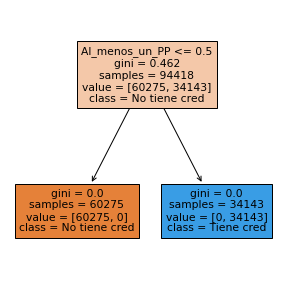

In [520]:
import matplotlib.pyplot as plt

fn = ['EDAD', 'BANCON_ACTIVO1', 'TIENE_TARJETA_CREDITO',
       'USA_CUENTA_ADELANTO', 'Al_menos_un_PP',
       'SITUACION_codif', 'CANTIDAD_PRODUCTOS_codif', 'NSE_codif',
       'ANIOS_ANTIGUEDAD_codif', 'CLASIFICACIONCLIENTE_codif',
       'SHARE_MERCADO_codif', 'SEXO_codif']

cn = ['No tiene cred','Tiene cred']

plt.figure(figsize=(5,5))
tree.plot_tree(clf,feature_names = fn, class_names=cn, filled = True)
plt.show()

En este punto, me estoy dando cuenta que si tiene un préstamo personal, es el préstamo por el cual pertenece a la clase "tiene préstamo personal". La variable explicativa debería ser "tiene al menos 2 préstamos personales" eso quiere decir que al momento de sacar un préstamo personal, ya tenía uno anterior. Estas, definitivamente, son las primeras personas a las que habría que dirigir la campaña. 
Veo dos opciones: eliminar la variable (y siempre recomendar incluir a las personas que ya tienen un préstamo personal entre el grupo destinatario de la campaña) o cambiar la variable para que cuente los que tienen más de 2 préstamos personales.
Voy por la primera.

In [521]:
df_modelo_2 = df_personas_final.drop(['ID_CLiente_BP','SEXO','ANIOS_ANTIGUEDAD','SUCURSAL_ACREDITACION',
                                    'SEGMENTO360','CLASIFICACIONCLIENTE','SHARE_MERCADO',
                                   'TOTAL_ADEUDADO', 'CANTIDAD_ENTIDADES','SITUACION',
                                   'POTENCIALIDAD_PP', 'MONTO_POTENCIAL_PP', 'UTILIZACION_TC',
                                   'UTILIZACION_TD', 'CLASIFICACION_VALOR_MAC','CANTIDAD_PRODUCTOS',
                                   'TIENE_CAJA_AHORRO','CANTIDAD_PRESTAMOS_PERSONALES','TIENE_PRESTAMO_HIPOTECARIO',
                                   'CANTIDAD_PRESTAMOS_HIPOTECARIOS','USA_CUENTA_CORRIENTE','TIENE_SEGURO_VIDA',
                                   'TIENE_SEGURO_PATRIMONIAL', 'TIENE_PLAZO_FIJO','TIENE_FONDO_COMUN_INVERSION',
                                   'TIENE_DOLARES', 'TIENE_CAJA_SEGURIDAD','INGRESO',
                                   'NSE', 'ENDEUDAMIENTO_202103', 'ROL_MONOTIIBB','REGIMEN_MONOT_IIBB','NSEcodif',
                                   'CLASIFICACION_VALOR_MAC_codif','Al_menos_un_PP'],axis=1)

In [522]:
y = df_modelo_2['TIENE_PRESTAMO_PERSONAL']
X = df_modelo_2.drop(['TIENE_PRESTAMO_PERSONAL'],axis=1)

In [523]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,)

In [533]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)

clf = clf.fit(X_train, y_train)

pred_y = clf.predict(X_test)

print('Real      : ', y_test[:20].values)
print('Prediccion: ', pred_y[:20])

Real      :  [0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0]
Prediccion:  [0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0]


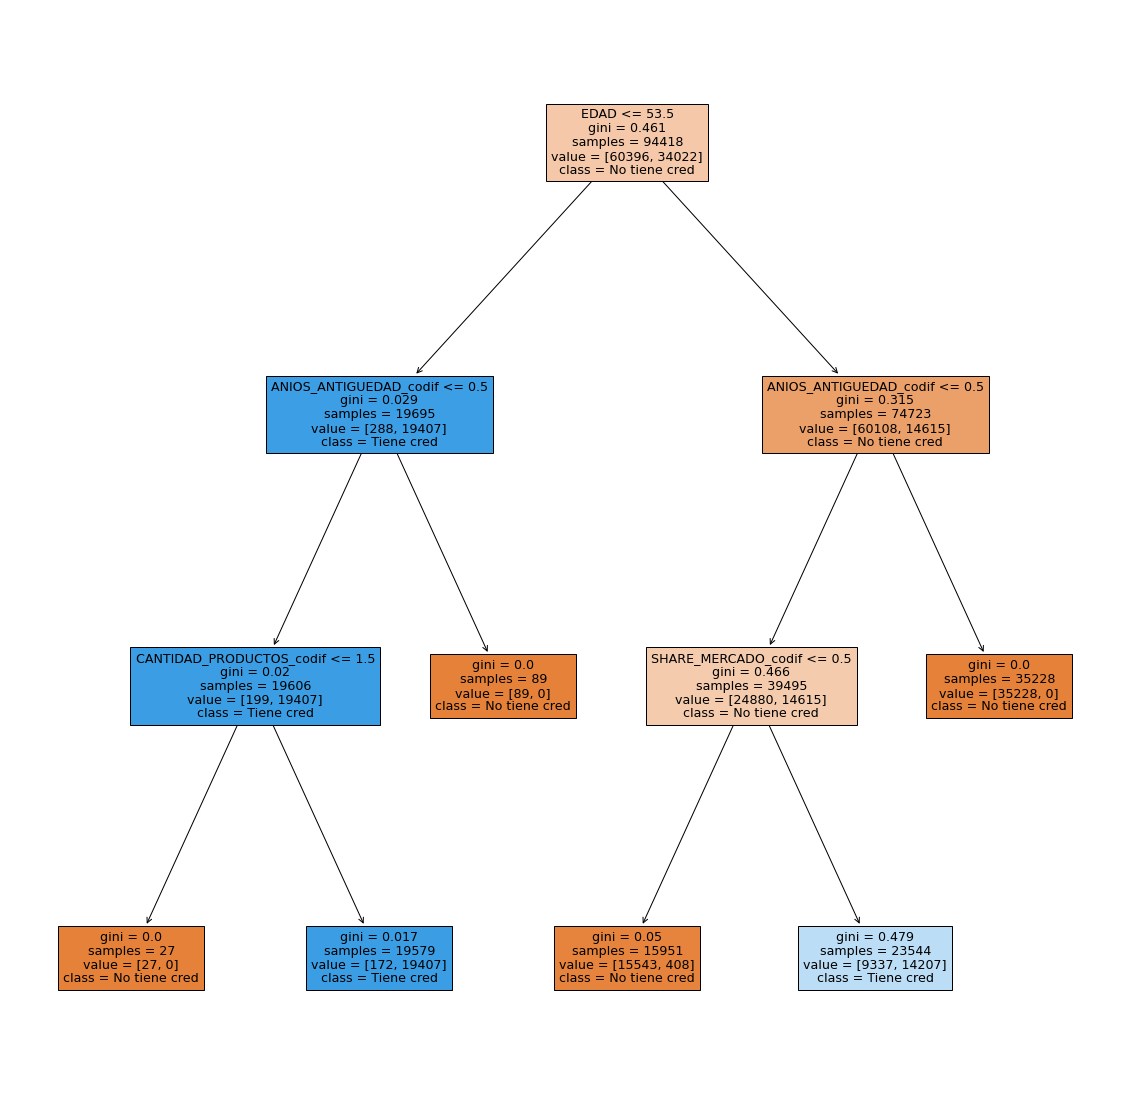

In [534]:
import matplotlib.pyplot as plt

fn = ['EDAD', 'BANCON_ACTIVO1', 'TIENE_TARJETA_CREDITO',
       'USA_CUENTA_ADELANTO',
       'SITUACION_codif', 'CANTIDAD_PRODUCTOS_codif', 'NSE_codif',
       'ANIOS_ANTIGUEDAD_codif', 'CLASIFICACIONCLIENTE_codif',
       'SHARE_MERCADO_codif', 'SEXO_codif']

cn = ['No tiene cred','Tiene cred']

plt.figure(figsize=(20,20))
tree.plot_tree(clf,feature_names = fn, class_names=cn, filled = True)
plt.show()

En principio (porque hay que analizar qué tan bien está ajustando el modelo), habría que apuntar a personas:

Menores de 50 años, con antigüedad menor a 13 años y más de un producto en el banco, o bien
Mayores de 50 años, con poca antigüedad y un share_mercado mayor al 50%.

Además, de las personas que ya tienen un préstamo presonal